In [1]:
from msmbuilder.example_datasets import FsPeptide
from msmbuilder.featurizer import DihedralFeaturizer

fs = FsPeptide().get().trajectories
n_atoms = fs[0].n_atoms
fs_dih_feat = DihedralFeaturizer().transform(fs)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X_train = np.vstack([traj[:8000] for traj in fs_dih_feat])

loading trajectory_1.xtc...
loading trajectory_10.xtc...
loading trajectory_11.xtc...
loading trajectory_12.xtc...
loading trajectory_13.xtc...
loading trajectory_14.xtc...
loading trajectory_15.xtc...
loading trajectory_16.xtc...
loading trajectory_17.xtc...
loading trajectory_18.xtc...
loading trajectory_19.xtc...
loading trajectory_2.xtc...
loading trajectory_20.xtc...
loading trajectory_21.xtc...
loading trajectory_22.xtc...
loading trajectory_23.xtc...
loading trajectory_24.xtc...
loading trajectory_25.xtc...
loading trajectory_26.xtc...
loading trajectory_27.xtc...
loading trajectory_28.xtc...
loading trajectory_3.xtc...
loading trajectory_4.xtc...
loading trajectory_5.xtc...
loading trajectory_6.xtc...
loading trajectory_7.xtc...
loading trajectory_8.xtc...
loading trajectory_9.xtc...


In [20]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, n_components=None, whiten=False)

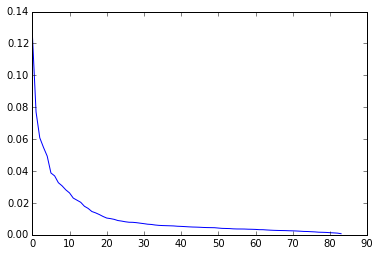

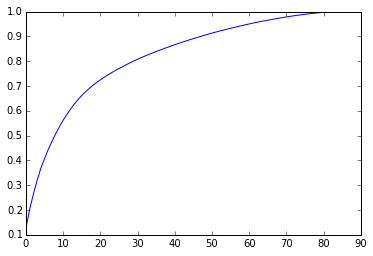

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [22]:
np.cumsum(pca.explained_variance_ratio_[:20])

array([ 0.12631749,  0.20338393,  0.2642495 ,  0.31907303,  0.36841625,
        0.40719971,  0.44414426,  0.47682893,  0.50753376,  0.53572956,
        0.56200125,  0.58504052,  0.60675376,  0.62715691,  0.64506708,
        0.6616204 ,  0.67623384,  0.68999798,  0.70271882,  0.71422662])

In [25]:
pca = PCA(20)
pca.fit(X_train)

PCA(copy=True, n_components=20, whiten=False)

In [26]:
y = pca.transform(X_train)[:,:20]

In [27]:
X_reconstructed = pca.inverse_transform(y)

In [28]:
np.mean(((X_reconstructed - X_train)**2).sum(1))

5.2748456

In [33]:
np.mean(((X_train-X_train.mean(0))**2).sum(1))

18.458143

In [30]:
5.

(84,)

In [32]:
(X_train - X_train.mean(0)).shape

(224000, 84)

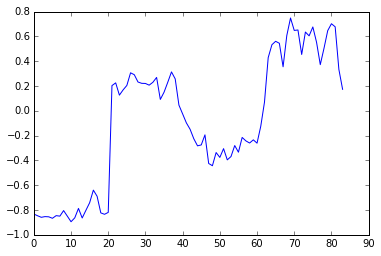

In [36]:
plt.plot(X_train.mean(0))

In [65]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
import numpy as np

# cut the sequence into semi-redundant sequences of maxlen steps
maxlen = 10
step = 3
sequences = []
next_frames = []
for traj in fs_dih_feat[:2]:
    for i in range(0, len(traj) - maxlen, step):
        sequences.append(traj[i : i + maxlen])
        next_frames.append(traj[i + maxlen])
print('nb sequences:', len(sequences))
ndim = fs_dih_feat[0].shape[1]

print('Vectorization...')
X = np.zeros((len(sequences), maxlen, ndim))
y = np.zeros((len(sequences), ndim))
for i, sequence in enumerate(sequences):
    X[i] = sequences[i]
    y[i] = next_frames[i]
    
X.shape,y.shape

nb sequences: 6660
Vectorization...


((6660, 10, 84), (6660, 84))

In [68]:
ndim

84

In [69]:
from keras.optimizers import SGD

print('Build model...')
model = Sequential()
model.add(LSTM(ndim, ndim*2, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(ndim*2, ndim*2, return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(ndim*2, ndim))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

INFO (theano.gof.compilelock): Refreshing lock /Users/joshuafass/.theano/compiledir_Darwin-14.4.0-x86_64-i386-64bit-i386-2.7.10-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /Users/joshuafass/.theano/compiledir_Darwin-14.4.0-x86_64-i386-64bit-i386-2.7.10-64/lock_dir/lock


Build model...


KeyboardInterrupt: 